In [47]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler

from datetime import datetime, timezone,timedelta
from ta.utils import dropna
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import KAMAIndicator, PercentagePriceOscillator, PercentageVolumeOscillator, ROCIndicator, RSIIndicator, StochasticOscillator
from ta.trend import MACD, ADXIndicator, AroonIndicator
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator

In [59]:
end = datetime.today() - timedelta(days=46)
start = datetime(2000, 9, 1)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df.rename(columns = {"Close": "price"}, inplace=True)

prices = df['price'].to_numpy()

df = df[30:len(df)]
df = df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)


df

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,price,kama,ppo,pvo,roc,macd,rsi,obv,adi,adx,aroon,stoo,boll_mavg,atr
Date,,,,,,,,,,,,,,
2015-09-05,1.295830,1.367693,-4.785612,-22.036810,13.650357,-0.060538,42.934435,1.255011e+06,-1.161445e+06,21.110482,10.0,69.992822,1.274445,0.229501
2015-09-06,1.246650,1.365338,-4.673776,-23.501877,7.471673,-0.057863,41.026635,7.659970e+05,-1.523198e+06,20.987104,-25.0,55.282354,1.282425,0.217939
2015-09-07,1.242430,1.362696,-4.543033,-25.229434,8.253901,-0.055215,40.858862,3.381050e+05,-1.755700e+06,20.899015,-25.0,54.020087,1.281603,0.206069
2015-09-08,1.206510,1.351718,-4.617088,-27.242097,1.269949,-0.054484,39.382582,-2.864300e+04,-2.064035e+06,20.927832,-20.0,31.202602,1.268683,0.195539
2015-09-09,1.165770,1.321194,-4.882203,-24.582975,-1.418959,-0.055514,37.718022,-6.914250e+05,-2.267168e+06,21.209244,-15.0,16.423030,1.257207,0.187673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,1236.512207,1206.445263,7.097784,8.786998,-2.038785,67.617759,58.461031,1.055966e+12,1.251418e+12,33.791964,85.0,61.411796,1190.465381,142.420937
2021-01-23,1230.990601,1206.975004,6.412212,5.044515,12.919856,62.259214,58.102078,1.028712e+12,1.247187e+12,31.997002,80.0,60.323532,1203.239526,137.337857
2021-01-24,1391.609375,1213.920119,6.901073,4.218413,33.368149,66.658216,64.860984,1.065130e+12,1.282103e+12,31.302432,60.0,91.980196,1220.808344,139.659244


In [60]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

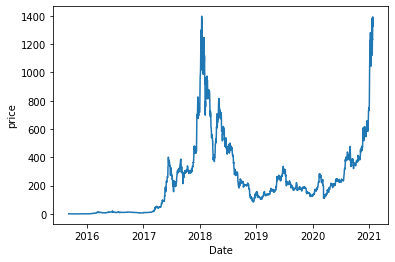

In [61]:
sns.lineplot(x=df.index, y="price", data=df);

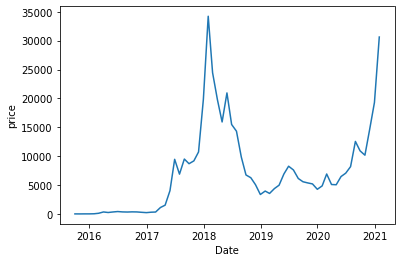

In [62]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="price", data=df_by_month);

In [63]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(1769, 17) (197, 17)


In [64]:
f_columns = ['price', 'kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr']

f_transformer = RobustScaler()
increase_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
increase_transformer = increase_transformer.fit(train[['increase']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['increase'] = increase_transformer.transform(train[['increase']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['increase'] = increase_transformer.transform(test[['increase']])

KeyError: "None of [Index(['increase'], dtype='object')] are in the [columns]"

In [65]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [55]:
time_steps = 7

X_train, y_train = create_dataset(train, train.increase, time_steps)
X_test, y_test = create_dataset(test, test.increase, time_steps)

print(X_train.shape, y_train.shape)

(1762, 7, 18) (1762,)


In [56]:
X_test.shape

(190, 7, 18)

In [57]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
50/50 [==============================] - 3s 17ms/step - loss: 0.5355 - val_loss: 0.3518
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 0.3327 - val_loss: 0.2786
Epoch 3/30
50/50 [==============================] - 0s 7ms/step - loss: 0.3334 - val_loss: 0.3633
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.3049 - val_loss: 0.3479
Epoch 5/30
50/50 [==============================] - 0s 6ms/step - loss: 0.2848 - val_loss: 0.2605
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.2666 - val_loss: 0.2590
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.2677 - val_loss: 0.2599
Epoch 8/30
50/50 [==============================] - 0s 7ms/step - loss: 0.2559 - val_loss: 0.2590
Epoch 9/30
50/50 [==============================] - 0s 7ms/step - loss: 0.2548 - val_loss: 0.2752
Epoch 10/30
50/50 [==============================] - 0s 6ms/step - loss: 0.2630 - val_loss: 0.2662
Epoch 11/30
50/50 

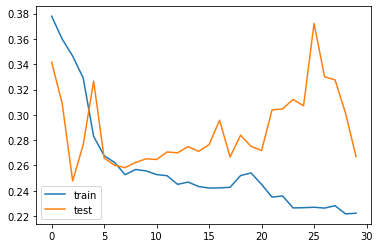

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [27]:
y_pred = model.predict(X_test)

In [29]:
y_train_inv = increase_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = increase_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = increase_transformer.inverse_transform(y_pred)

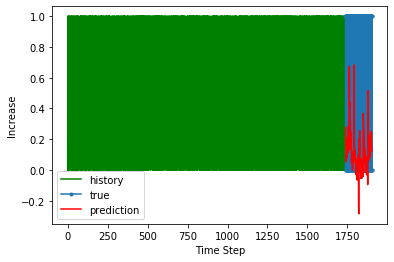

In [30]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Increase')
plt.xlabel('Time Step')
plt.legend()
plt.show();

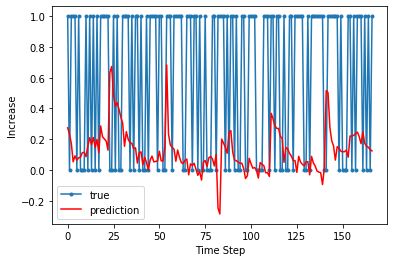

In [31]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Increase')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [34]:
end = datetime.today()
start = datetime.today() - timedelta(days=56)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df.rename(columns = {"Close": "price"}, inplace=True)
prices = df['price'].to_numpy()

increase = []
for i in range(0, len(prices)):
    if(i == len(prices)-1):
        increase.append(1)
    else:
        if(prices[i+1] > prices[i]):
            increase.append(1)
        else:
            increase.append(0)

df['increase'] = increase


df = df[27:60]
df =  df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
predict =  df.iloc[:len(df)]

f_columns = ['price', 'kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr']

f_transformer = RobustScaler()
increase_transformer = RobustScaler()

increase_transformer = increase_transformer.fit(predict[['increase']])

f_transformer = f_transformer.fit(predict[f_columns].to_numpy())

predict.loc[:, f_columns] = f_transformer.transform(predict[f_columns].to_numpy())
predict['increase'] = increase_transformer.transform(predict[['increase']])

Xs = []
v = predict.values
Xs.append(v)

X_predict= np.array(Xs)

y_predicted = model.predict(X_predict)

y_predicted_inv = increase_transformer.inverse_transform(y_predicted)

y_predicted_inv

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


array([[-0.10518432]], dtype=float32)